In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index - fear_greed_index.csv")

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.head()


Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
trades['time_ist'] = pd.to_datetime(trades['Timestamp IST'])
trades['trade_date'] = trades['time_ist'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['trade_date'] = sentiment['date'].dt.date


merged = pd.merge(
    trades,
    sentiment[['trade_date', 'classification']],
    on='trade_date',
    how='inner'
)

print("Merged shape:", merged.shape)
merged.head()

Merged shape: (211218, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,time_ist,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02 22:50:00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02 22:50:00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02 22:50:00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02 22:50:00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02 22:50:00,Extreme Greed


In [9]:
merged.columns = (
    merged.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

merged.columns


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'time_ist', 'classification'],
      dtype='object')

In [10]:
merged['is_profitable'] = merged['closed_pnl'] > 0
merged['abs_pnl'] = merged['closed_pnl'].abs()
merged['trade_volume'] = merged['size_usd']

merged[['closed_pnl', 'is_profitable', 'trade_volume', 'classification']].head()


,closed_pnl,is_profitable,trade_volume,classification
0,0.0,False,7872.16,Extreme Greed
1,0.0,False,127.68,Extreme Greed
2,0.0,False,1150.63,Extreme Greed
3,0.0,False,1142.04,Extreme Greed
4,0.0,False,69.75,Extreme Greed


In [11]:
pnl_by_sentiment = merged.groupby('classification')['closed_pnl'].mean()
pnl_by_sentiment


,closed_pnl
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


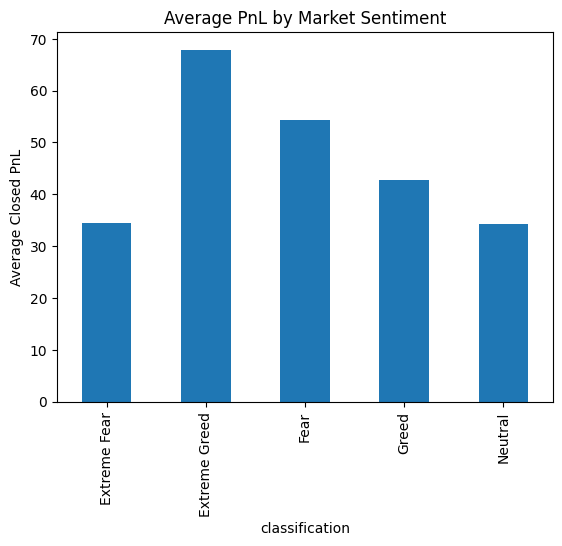

In [12]:
import matplotlib.pyplot as plt

pnl_by_sentiment.plot(kind='bar', title='Average PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()


In [13]:
win_rate = merged.groupby('classification')['is_profitable'].mean() * 100
win_rate


,is_profitable
classification,
Extreme Fear,37.060748
Extreme Greed,46.494299
Fear,42.076750
Greed,38.482794
Neutral,39.699093


In [14]:
volume_by_sentiment = merged.groupby('classification')['trade_volume'].mean()
volume_by_sentiment


,trade_volume
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


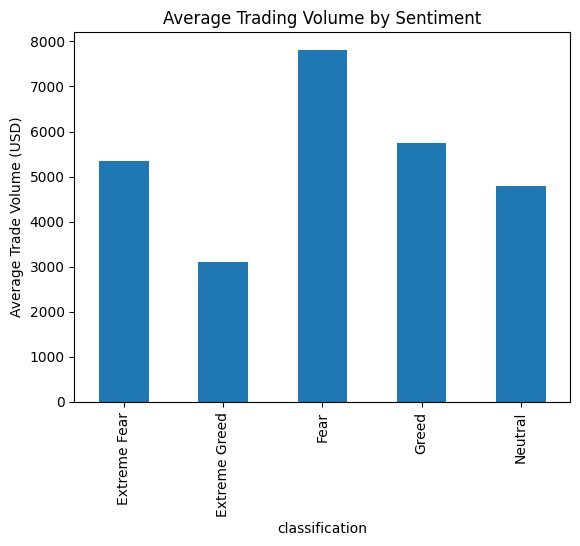

In [15]:
volume_by_sentiment.plot(kind='bar', title='Average Trading Volume by Sentiment')
plt.ylabel('Average Trade Volume (USD)')
plt.show()


In [16]:
import os

os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

merged.to_csv('csv_files/processed_trading_data.csv', index=False)

pnl_by_sentiment.plot(kind='bar')
plt.savefig('outputs/pnl_vs_sentiment.png')
plt.close()

volume_by_sentiment.plot(kind='bar')
plt.savefig('outputs/volume_vs_sentiment.png')
plt.close()
